In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline


In [11]:
df = pd.read_csv("data/eda_details.csv")
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.0,3.0,2400.0,9373.0,2.0,NaN,0.0,3,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,100100050,3.0,1.0,1320.0,11090.0,1.0,0.0,0.0,3,7,1320.0,0.0,1955,0.0,98155,47.7748,-122.304,1320.0,8319.0
2,1001200035,3.0,1.0,1350.0,7973.0,1.5,NaN,0.0,3,7,1350.0,0.0,1954,0.0,98188,47.4323,-122.292,1310.0,7491.0
3,1001200050,4.0,1.5,1260.0,7248.0,1.5,NaN,0.0,5,7,1260.0,0.0,1955,NaN,98188,47.4330,-122.292,1300.0,7732.0
4,1003000175,3.0,1.0,980.0,7606.0,1.0,0.0,0.0,3,7,980.0,0.0,1954,0.0,98188,47.4356,-122.290,980.0,8125.0


In [3]:
df['year_bins'] = df.yr_built.map(lambda x:
    1 if x >= 1900 & x<=1940
    else(2 if x > 1940 & x<=1980
    else 3))

df['year_bins']

0        1
1        1
2        1
3        1
4        1
        ..
21415    1
21416    1
21417    1
21418    1
21419    1
Name: year_bins, Length: 21420, dtype: int64

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_bins
0,1000102,6.0,3.00,2400.0,9373.0,2.0,NaN,0.0,3,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0,3
1,100100050,3.0,1.00,1320.0,11090.0,1.0,0.0,0.0,3,7,1320.0,0.0,1955,0.0,98155,47.7748,-122.304,1320.0,8319.0,2
2,1001200035,3.0,1.00,1350.0,7973.0,1.5,NaN,0.0,3,7,1350.0,0.0,1954,0.0,98188,47.4323,-122.292,1310.0,7491.0,2
3,1001200050,4.0,1.50,1260.0,7248.0,1.5,NaN,0.0,5,7,1260.0,0.0,1955,NaN,98188,47.4330,-122.292,1300.0,7732.0,2
4,1003000175,3.0,1.00,980.0,7606.0,1.0,0.0,0.0,3,7,980.0,0.0,1954,0.0,98188,47.4356,-122.290,980.0,8125.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,993002177,3.0,2.50,1380.0,1547.0,3.0,0.0,0.0,3,8,1380.0,0.0,2000,NaN,98103,47.6908,-122.341,1380.0,1465.0,3
21416,993002225,3.0,2.25,1520.0,1245.0,3.0,NaN,0.0,3,8,1520.0,0.0,2004,0.0,98103,47.6907,-122.340,1520.0,1470.0,3
21417,993002247,3.0,2.25,1550.0,1469.0,3.0,0.0,0.0,3,8,1550.0,0.0,2004,0.0,98103,47.6911,-122.341,1520.0,1465.0,3
21418,993002325,2.0,1.50,950.0,4625.0,1.0,0.0,0.0,4,7,950.0,0.0,1949,NaN,98103,47.6912,-122.340,1440.0,4625.0,2


Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'bins', 'range'],
      dtype='object')
['369.999-4760.0', '4760.0-9150.0', '9150.0-13540.0']


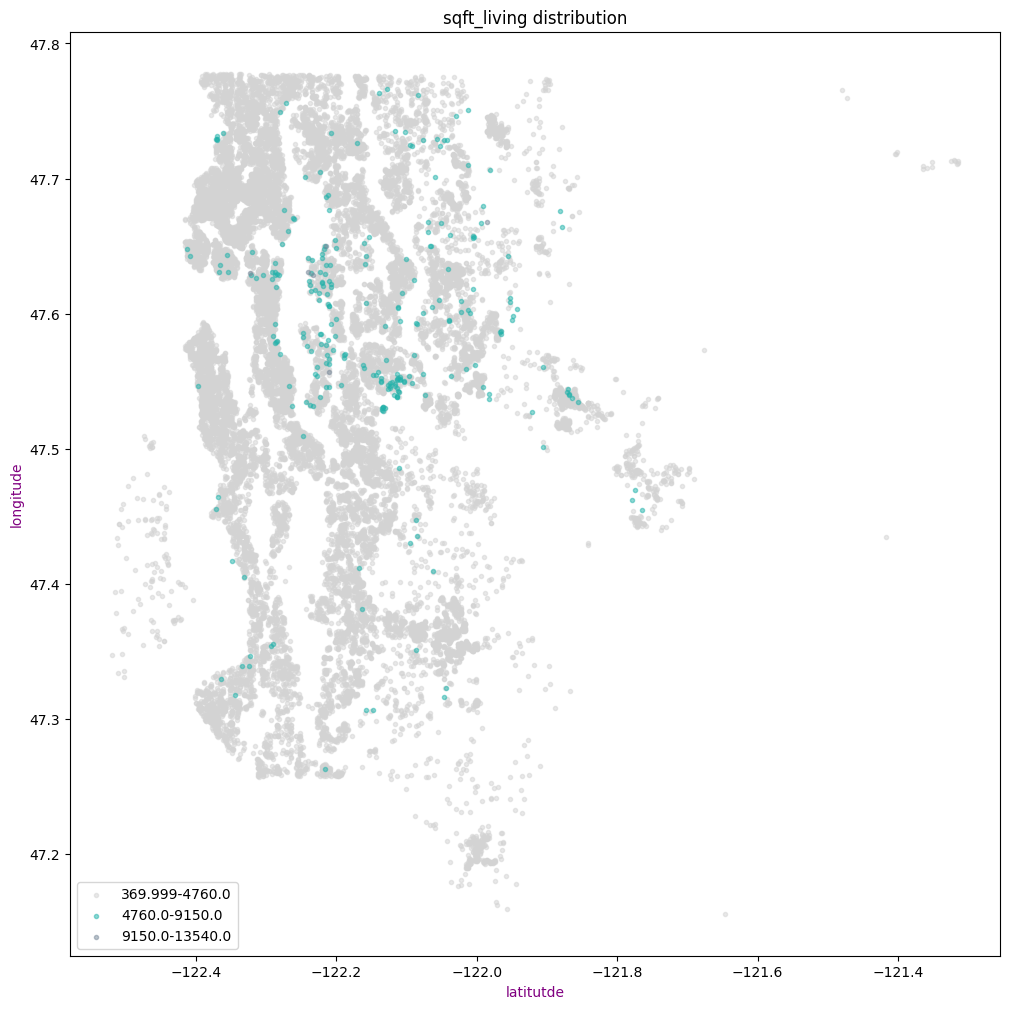

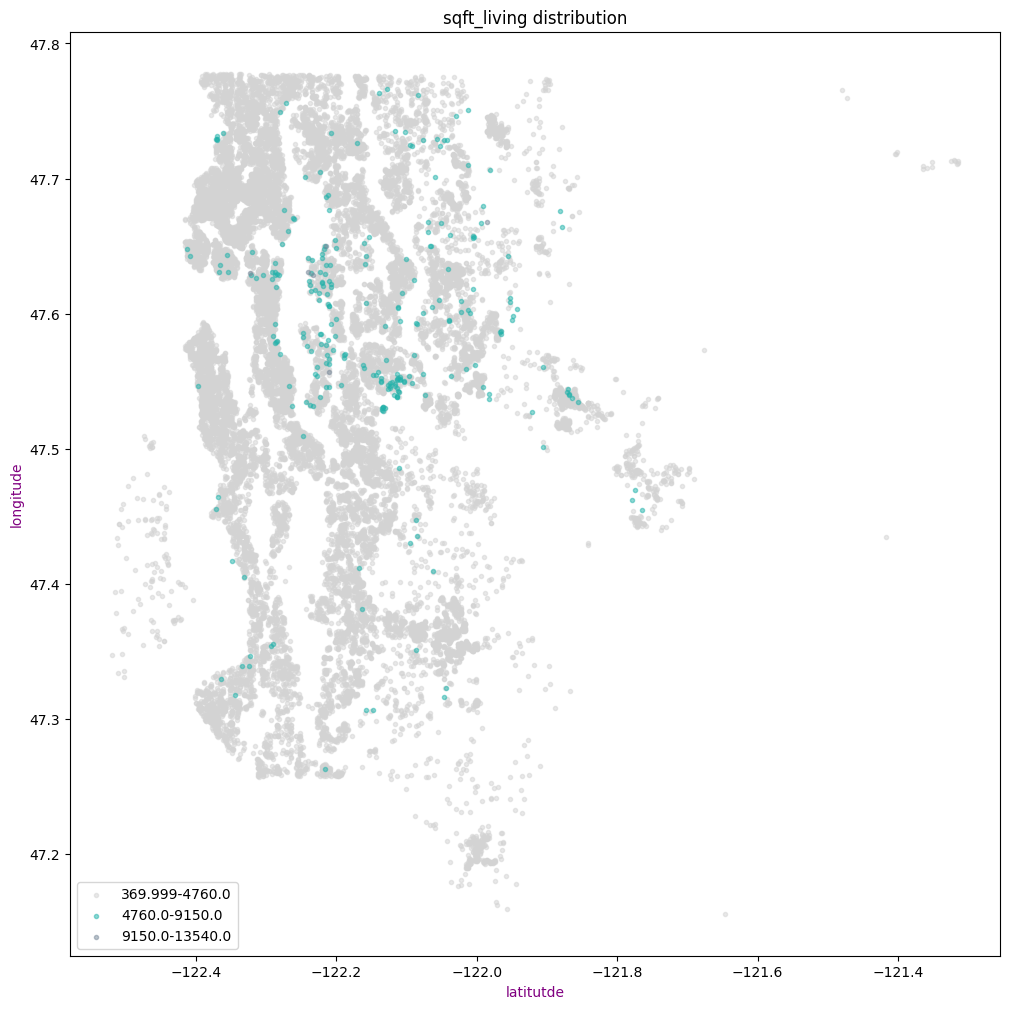

In [177]:
def bin_creation(data_set, column_to_bin, number_of_bins):
    
    # data_set = input data set
    # column_to_bin = column that I will be binning
    # number of partitions
    
    # attach variable to infunction variable
    infun_df = data_set
    
    
    infun_column = column_to_bin
    infun_no_bins = number_of_bins
    """
    infun_column = 'yr_built'
    infun_no_bins = 3
    """
    
    #find range of column
    column_max = infun_df[infun_column].max()
    column_min = infun_df[infun_column].min()
    
    #find range of column through standard deviations
    #column_max = infun_df[infun_column].mean()+ 2*infun_df[infun_column].std()
    #column_min = infun_df[infun_column].mean()- 2*infun_df[infun_column].std()
    
    

    column_range = column_max-column_min 
    column_step = column_range/infun_no_bins
    cut_ranges = [] 
    #list(range(67, 489, column_step))
    for i in range(infun_no_bins+1):
        hi = int(round((i*column_step + column_min)))
        cut_ranges.append(hi)
        
    # the bins will need names
    bin_names = list(range(1, infun_no_bins+1))

    # CUT function that creates the bins
    infun_df['bins'] = pd.cut(infun_df[infun_column], bins=cut_ranges, labels=bin_names,include_lowest=True)

    # also provide the range, this may be useful later
    infun_df['range'] = pd.cut(infun_df[infun_column], bins=cut_ranges,include_lowest=True)

    lat_dict = {}
    long_dict = {}
    
    # create a for loop and save the coordinates for each bin within a dictionary
    for i in range(1, infun_no_bins+1):
        hi1 = infun_df.loc[infun_df["bins"]==i].lat
        hi2 = infun_df.loc[infun_df["bins"]==i].long
        lat_dict[i] = hi1
        long_dict[i] = hi2
        
    all_houses = plt.figure(figsize = (12,12))
        
    # create out graph labels 
    graph_labels = infun_df['range'].unique().sort_values()
    graph_label_list = []
    for i in range(len(graph_labels)):
        hi3 = str(graph_labels[i]).replace("(", "").replace(", ", "-").replace("]", "")
        graph_label_list.append(hi3)
        
    print(graph_label_list)
        
        
    # Create list of colours
    colour_list= []
    for i in range(1, infun_no_bins+1):
        CSS4_COLORS_list = list(mcolors.CSS4_COLORS.keys())
        hi4 = colour_list.append(CSS4_COLORS_list[70+i*3])        
           
    for i in range(1, infun_no_bins+1):
        plt.scatter(long_dict[i], lat_dict[i],label= graph_label_list[i-1], color=colour_list[i-1], marker=".",alpha=0.5)

    plt.title(infun_column + " distribution")
    plt.legend()

    plt.xlabel('latitutde', color='purple')
    plt.ylabel('longitude', color='purple')
    
    return all_houses
    """for i in range(infun_no_bins):
        #BIN CREATION
        # first bin is all-inclusive
        if i == 1:
            infun_df['binned_column'] = np.where((df[column_to_bin] >=1900) & (df[column_to_bin] <=1940), 1, df['binned_column'])
        # all other bins;
        # are just greater on the lower end 
        # and equal or lower than on the higher end
            else:
            infun_df['binned_column'] = np.where((df[column_to_bin] > 1900) & (df[column_to_bin] <=1940), 1, df['binned_column'])
"""
print(df.columns)
bin_creation(df, 'sqft_living', 3)    

In [155]:
df['yr_built'].std()

29.38714057964422

In [118]:

list(mcolors.CSS4_COLORS.keys())

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

In [52]:
lat1 = df1.loc[df1['bins']==1].lat
lat1


13       47.5359
29       47.5691
63       47.5704
274      47.5322
324      47.5400
          ...   
21350    47.6132
21354    47.6120
21355    47.6113
21356    47.6115
21357    47.6112
Name: lat, Length: 1175, dtype: float64

In [ ]:
def map_creation(data_set):
    lat1 = df1.loc[df1['year_bins']==1].lat
    long1 = df.loc[df['year_bins']==1].long

In [10]:
# 489 
# 67

column_min = 67
column_max = 489
infun_no_bins = 6

column_range = column_max-column_min 
column_step = column_range/infun_no_bins
cut_ranges = [] 
#list(range(67, 489, column_step))
for i in range(infun_no_bins+1):
    hi = round((i*column_step + column_min),1)
    cut_ranges.append(hi)
    
print(list(range(1, infun_no_bins+1)))


[1, 2, 3, 4, 5, 6]


Text(0, 0.5, 'longitude')

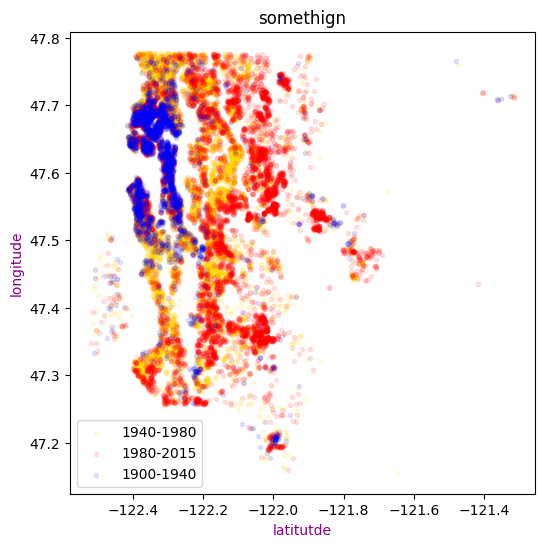

In [88]:
lat1 = df.loc[df['year_bins']==1].lat
long1 = df.loc[df['year_bins']==1].long

lat2 = df.loc[df['year_bins']==2].lat
long2 = df.loc[df['year_bins']==2].long

lat3 = df.loc[df['year_bins']==3].lat
long3 = df.loc[df['year_bins']==3].long

all_houses = plt.figure(figsize = (6,6))

plt.scatter(long2,lat2, label= '1940-1980', color ='gold', marker=".",alpha=0.1)
plt.scatter(long3,lat3, label= '1980-2015', color='red', marker=".",alpha=0.1)
plt.scatter(long1,lat1, label= '1900-1940', color='blue', marker=".",alpha=0.1)


plt.title('somethign')
plt.legend()

plt.xlabel('latitutde', color='purple')
plt.ylabel('longitude', color='purple')





In [5]:
#import csv file
df_details = pd.read_csv("data/eda_details.csv")
df_Sales = pd.read_csv("data/eda_sales.csv")
df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_bins
0,1000102,6.0,3.0,2400.0,9373.0,2.0,NaN,0.0,3,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0,1
1,100100050,3.0,1.0,1320.0,11090.0,1.0,0.0,0.0,3,7,1320.0,0.0,1955,0.0,98155,47.7748,-122.304,1320.0,8319.0,1
2,1001200035,3.0,1.0,1350.0,7973.0,1.5,NaN,0.0,3,7,1350.0,0.0,1954,0.0,98188,47.4323,-122.292,1310.0,7491.0,1
3,1001200050,4.0,1.5,1260.0,7248.0,1.5,NaN,0.0,5,7,1260.0,0.0,1955,NaN,98188,47.4330,-122.292,1300.0,7732.0,1
4,1003000175,3.0,1.0,980.0,7606.0,1.0,0.0,0.0,3,7,980.0,0.0,1954,0.0,98188,47.4356,-122.290,980.0,8125.0,1


In [6]:
def clean_dataframe(data_var):

    infun_Data = data_var
    #2 CLEANING COLUMN NAMES --- may wanna make this into a function
    # replacing empty spaces with underscores in column names
    infun_Data.columns = infun_Data.columns.str.replace(' ','_')
    # changing all column names to lower case
    infun_Data.columns = infun_Data.columns.str.lower()
    # renaming last column
    infun_Data = infun_Data.rename({'-':'weather'},axis=2)

    #2 CHECK FOR DUPLICATES
    try: 
        num_of_Duplicates = infun_Data.duplicated().value_counts()[2]
    except: 
        num_of_Duplicates = 0
        pass
    
    yORn = input("The dataset has " + str(num_of_Duplicates) + " duplicates . Would you like to delete them? Yes [Y] else press any key?")

    if yORn == 'Y' or 'y':
        infun_Data = infun_Data.drop_duplicates()
    else:
        infun_Data = infun_Data

    # remove duplicates
    infun_Data = infun_Data.drop_duplicates()
    # reset index inplace
    infun_Data.reset_index(inplace=True, drop=True)
    
    # check data types in data frame
    infun_data_types = infun_Data.dtypes
    print("""Below are the data types;
          """ + str(infun_data_types) + """ 
          """)
    input("""Below are the data types;""")

    #no date needed
    #infun_Data['yr_built'] = pd.to_datetime(infun_Data['yr_built'], format='%Y')
    
    return infun_Data
clean_dataframe(df)


df['view'].unique()
#year built
#year renovated
#zipcode

ValueError: No axis named 2 for object type DataFrame

In [ ]:
try:
    blah()
except:
    pass

In [ ]:
# CHECK FOR DUPLICATES
df.duplicated().value_counts()
##### in this case none are duplicated
# remove duplicates
df = df.drop_duplicates()
# reset index inplace
df.reset_index(inplace=True, drop=True)
df.head(5)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.0,3.0,2400.0,9373.0,2.0,NaN,0.0,3,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,100100050,3.0,1.0,1320.0,11090.0,1.0,0.0,0.0,3,7,1320.0,0.0,1955,0.0,98155,47.7748,-122.304,1320.0,8319.0
2,1001200035,3.0,1.0,1350.0,7973.0,1.5,NaN,0.0,3,7,1350.0,0.0,1954,0.0,98188,47.4323,-122.292,1310.0,7491.0
3,1001200050,4.0,1.5,1260.0,7248.0,1.5,NaN,0.0,5,7,1260.0,0.0,1955,NaN,98188,47.4330,-122.292,1300.0,7732.0
4,1003000175,3.0,1.0,980.0,7606.0,1.0,0.0,0.0,3,7,980.0,0.0,1954,0.0,98188,47.4356,-122.290,980.0,8125.0
